In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


from sklearn import datasets
from copy import deepcopy
from tqdm import tqdm

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [4]:
TARGET_NAME = 'mean_exam_points'
FEATURE_NAMES = ['age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history']

In [5]:
X = df[FEATURE_NAMES].values
y = df[TARGET_NAME].values

print(X.shape, y.shape)

(10000, 10) (10000,)


In [6]:
print(X.shape)

(10000, 10)


In [7]:
def calc_mse(y, y_pred):
    """mse"""
    err = np.mean((y - y_pred)**2)
    return err

In [8]:
def eval_sgd_model(X, y, iterations=300, qty_in_batch=1, alpha=1e-4):
    """SGD"""
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    err = np.zeros(iterations)
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in  tqdm(range(1, iterations+1)):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err[i-1] = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))

    if i % (iterations / 10) == 0:
        print(i, W, err[i-1])
    return W, err

In [9]:
def r_2(y_pred, y_true):
  numerator = ((y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
  denominator = ((y_true - np.average(y_true)) ** 2).sum(axis=0,
                                                          dtype=np.float64)
  return 1 - (numerator / denominator)

In [10]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                                                                    test_size = 0.3,
                                                                    random_state = 1)

In [11]:
train_data = np.vstack([np.ones(train_data.shape[0]), train_data.T]) 

In [12]:
test_data = np.vstack([np.ones(test_data.shape[0]), test_data.T]) 

In [13]:
W_gb_train, err_gb_train = eval_sgd_model(train_data, train_labels, alpha=1e-3)


100%|██████████| 300/300 [01:21<00:00,  3.83it/s]

300 [ 0.42070843  0.51476152  0.23361616  0.02920563  2.14629356  1.37041807
  0.51822094  0.92355344  0.708408    1.16576379 -0.526232  ] 859.9503047045754


In [14]:
W_gb_test, err_gb_test = eval_sgd_model(test_data, test_labels, alpha=1e-3)

100%|██████████| 300/300 [00:36<00:00,  8.27it/s]

300 [ -0.89773227   1.16614481 -22.32098769   0.04314243  -8.96124843
  12.96751838  -4.94090504  -8.7480337   -3.38872423   4.0576098
  -1.78918342] 2862.6002400293833


In [17]:
train_pred = np.dot(W_gb_train, train_data)

In [18]:
test_pred = np.dot(W_gb_test, test_data)

In [19]:
r_2(train_pred, train_labels)

-0.8625049622267555

In [20]:
r_2(test_pred, test_labels)

-8.324571711638885

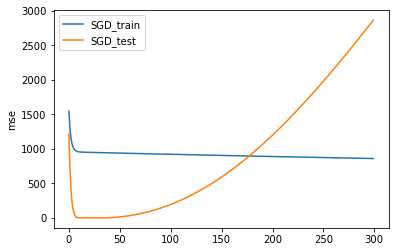

In [16]:
x = np.arange(300)
plt.plot(x, err_gb_train, label="SGD_train")
plt.plot(x, err_gb_test, label="SGD_test")
plt.ylabel("mse")
plt.legend()
plt.show()

In [14]:
df_test = pd.read_csv('test.csv')

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
Id                     10000 non-null int64
age                    10000 non-null float64
years_of_experience    10000 non-null float64
lesson_price           10000 non-null float64
qualification          10000 non-null float64
physics                10000 non-null float64
chemistry              10000 non-null float64
biology                10000 non-null float64
english                10000 non-null float64
geography              10000 non-null float64
history                10000 non-null float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


In [16]:
X_test = df_test[FEATURE_NAMES].values

print(X_test.shape)

(10000, 10)


In [17]:
X_test = np.vstack([np.ones(X_test.shape[0]), X_test.T])

In [18]:
test_pred = np.dot(W_gb, X_test)

In [19]:
test_pred

array([53.37071791, 74.90346101, 71.74779852, ..., 49.03640786,
       74.23038856, 84.75370661])

In [20]:
submissions = pd.concat([df_test['Id'], pd.Series(test_pred)], axis=1)
submissions = submissions.rename(columns={0: 'mean_exam_points'})

In [21]:
submissions

,Id,mean_exam_points
0,10000,53.370718
1,10001,74.903461
2,10002,71.747799
3,10003,113.639956
4,10004,113.416988
...,...,...
9995,19995,62.635447
9996,19996,89.303673
9997,19997,49.036408
9998,19998,74.230389


In [22]:
submissions.to_csv('VPavlov_predictions_1.csv',index=None)